In [23]:
import pandas as pd
import numpy as np
# import wget
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import PartialDependenceDisplay
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

In [24]:
# Download the data (public github)
# !wget -N https://github.com/fiddler-labs/p2p-lending-data/raw/refs/heads/master/raw_data/accepted_2007_to_2018Q3.csv.gz

In [25]:
df = pd.read_csv('accepted_2007_to_2018Q3.csv.gz')

C:\Users\rbrul\AppData\Local\Temp\ipykernel_26568\2329708970.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accepted_2007_to_2018Q3.csv.gz')


In [26]:
pd.set_option('display.max_columns', None)
print(df.columns.tolist())
print(f'Total number of columns: {len(df.columns)}')

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

In [27]:
df.groupby(['loan_status']).size()

loan_status
Charged Off                                             254777
Current                                                 822105
Default                                                     32
Does not meet the credit policy. Status:Charged Off        761
Does not meet the credit policy. Status:Fully Paid        1988
Fully Paid                                             1011841
In Grace Period                                          12458
Late (16-30 days)                                         5442
Late (31-120 days)                                       22852
dtype: int64

In [28]:
df = df[df['loan_status'].isin(['Charged Off', 'Fully Paid'])]

In [29]:
df.groupby(['loan_status']).size()

loan_status
Charged Off     254777
Fully Paid     1011841
dtype: int64

**Your code below**

*   Reduce the overall data set to 200K rows or less
*   Split your data for training / testing
*   Build at least two models with `loan_status` as the target
*   Report on the model's performance
*   Report on the model's drivers (feature importance / effects)

Plant 2 flaws in this notebook.  Do not "give away" the answers here.  This notebook should appear, at first glance, to create a viable model.

Make a note of your flaws and be prepared to talk about how the code / results look when they are "fixed".  You will need to talk about those in the final presentation.

In [30]:
import pickle

# Replace 'your_file.pkl' with the path to your pickle file
file_path = "C:/Users/rbrul/Documents/GitHub/DSBA6010/Final_Project/clean_df_for_eda.pkl"
# file_path = "/Users/jakebrulato/Documents/GitHub/DSBA6010/Final_Project/clean_df_for_eda.pkl"
# file_path = '/Users/jakebrulato/Documents/GitHub/DSBA6010/Final_Project/clean_df_5pct_subset.pkl'

# Open the pickle file in read-binary mode
with open(file_path, 'rb') as file:
    data = pickle.load(file)

# The 'data' variable now contains the loaded object
data

,acc_now_delinq,acc_open_past_24mths,addr_state,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,fico_range_high,fico_range_low,grade,inq_last_6mths,installment,int_rate,issue_d,loan_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,sub_grade,tax_liens,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,zip_code,credit_line_age,fully_paid,application_type_Joint App,emp_length_10+ years,emp_length_2-4 years,emp_length_5-9 years,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,verification_status_Source Verified,verification_status_Verified,application_type,emp_length,home_ownership,purpose,term,verification_status
2,0.0,2.0,WA,30000.00,2954.0,14338.0,38.2,0.0,0.0,0.0,0.0,9.26,669.0,665.0,3,0.0,427.78,0.1699,2016-12-01,12000.0,1000.0,241.0,0.0,0.0,0.0,227.0,227.0,72.0,0.0,190.0,10.0,198.0,0.0,3.0,3.0,3.0,4.0,0.0,3.0,5.0,3.0,3.0,0.0,2.0,3.0,100.0,0.0,3.0,0.0,8862.0,0.382,15,3.0,0.0,8862.0,23200.0,5.0,8862.0,23200.0,0.0,23200.0,982,7335,1,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Individual,0-1 years,RENT,credit_card,36 months,Not Verified
7,0.0,5.0,OH,54000.00,18460.0,4154.0,86.8,0.0,0.0,0.0,0.0,20.00,689.0,685.0,4,1.0,767.66,0.2549,2016-12-01,25900.0,158.0,382.0,14.0,14.0,3.0,56.0,56.0,124.0,15.0,56.0,2.0,56.0,0.0,3.0,3.0,4.0,7.0,10.0,7.0,13.0,3.0,9.0,0.0,0.0,9.0,96.2,50.0,0.0,0.0,27346.0,0.645,23,0.0,0.0,166140.0,191665.0,26.0,31985.0,31500.0,7665.0,42400.0,433,11657,0,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,Individual,10+ years,MORTGAGE,credit_card,60 months,Verified
9,0.0,2.0,KS,57000.00,20887.0,20.0,99.2,0.0,0.0,3.0,0.0,28.45,684.0,680.0,0,0.0,250.66,0.0799,2016-12-01,8000.0,242.0,227.0,9.0,9.0,3.0,7.0,21.0,124.0,9.0,29.0,9.0,26.0,2.0,1.0,3.0,1.0,10.0,16.0,3.0,15.0,3.0,7.0,1.0,1.0,7.0,76.5,100.0,0.0,0.0,5938.0,0.367,4,0.0,0.0,146207.0,185355.0,34.0,71902.0,2500.0,88422.0,16200.0,666,7366,1,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,Individual,10+ years,MORTGAGE,credit_card,36 months,Source Verified
12,0.0,5.0,IN,101800.00,21012.0,718.0,77.6,0.0,0.0,0.0,0.0,18.91,724.0,720.0,0,0.0,391.50,0.0532,2016-12-01,13000.0,142.0,233.0,11.0,11.0,3.0,227.0,227.0,79.0,11.0,190.0,11.0,198.0,0.0,1.0,4.0,1.0,4.0,7.0,5.0,11.0,4.0,8.0,0.0,2.0,8.0,100.0,100.0,3.0,0.0,21213.0,0.575,0,0.0,0.0,168092.0,244965.0,21.0,42058.0,3200.0,52184.0,36900.0,461,7093,0,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Individual,10+ years,MORTGAGE,credit_card,36 months,Not Verified
16,0.0,10.0,CT,60000.00,1265.0,5110.0,54.4,0.0,0.0,0.0,0.0,16.49,669.0,665.0,1,1.0,164.74,0.1144,2016-12-01,5000.0,110.0,139.0,9.0,9.0,0.0,227.0,227.0,124.0,9.0,190.0,1.0,198.0,0.0,8.0,12.0,8.0,9.0,7.0,17.0,18.0,12.0,20.0,0.0,2.0,20.0,100.0,62.5,0.0,0.0,10377.0,0.278,8,0.0,0.0,

In [31]:
# Subset while maintaining distribution.

subset_size = 200000

proportions = data['fully_paid'].value_counts(normalize=True)
sample_sizes = (proportions * subset_size).round().astype(int)

shorten_df = (
    data.groupby('fully_paid', group_keys=False)
    .apply(lambda group: group.sample(n=sample_sizes[group.name], random_state=42))
)

shorten_df

C:\Users\rbrul\AppData\Local\Temp\ipykernel_26568\4246033523.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.sample(n=sample_sizes[group.name], random_state=42))


,acc_now_delinq,acc_open_past_24mths,addr_state,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,fico_range_high,fico_range_low,grade,inq_last_6mths,installment,int_rate,issue_d,loan_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,sub_grade,tax_liens,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,zip_code,credit_line_age,fully_paid,application_type_Joint App,emp_length_10+ years,emp_length_2-4 years,emp_length_5-9 years,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,verification_status_Source Verified,verification_status_Verified,application_type,emp_length,home_ownership,purpose,term,verification_status
1609999,0.0,2.0,CA,113900.0,64734.0,11871.0,62.8,0.0,0.0,0.0,0.0,24.58,689.0,685.0,2,0.0,512.60,0.1399,2015-12-01,15000.0,125.0,240.0,28.0,4.0,5.0,67.0,67.0,75.0,28.0,190.0,26.0,198.0,1.0,3.0,3.0,4.0,6.0,4.0,4.0,7.0,3.0,9.0,0.0,2.0,9.0,87.5,25.0,1.0,1.0,20029.0,0.628,13,0.0,0.0,582609.0,696542.0,16.0,104609.0,31900.0,128642.0,31900.0,951,7305,0,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Individual,5-9 years,MORTGAGE,credit_card,36 months,Verified
1791024,0.0,9.0,MA,45000.0,2716.0,7922.0,28.0,0.0,0.0,0.0,0.0,35.84,734.0,730.0,2,1.0,322.04,0.1269,2015-07-01,9600.0,36.0,119.0,1.0,1.0,0.0,81.0,227.0,124.0,12.0,81.0,4.0,81.0,0.0,3.0,7.0,5.0,8.0,5.0,13.0,17.0,7.0,17.0,0.0,6.0,17.0,95.7,0.0,0.0,0.0,7228.0,0.239,11,0.0,0.0,46164.0,80696.0,23.0,46164.0,11000.0,46732.0,30200.0,019,3833,0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Individual,5-9 years,RENT,credit_card,36 months,Not Verified
238604,0.0,0.0,CA,24400.0,204.0,8846.0,7.9,0.0,0.0,0.0,0.0,7.48,804.0,800.0,4,0.0,362.30,0.1999,2016-02-01,9750.0,1000.0,164.0,30.0,30.0,1.0,227.0,227.0,124.0,30.0,190.0,26.0,198.0,0.0,3.0,5.0,3.0,3.0,0.0,6.0,8.0,6.0,6.0,0.0,0.0,6.0,100.0,0.0,0.0,0.0,1223.0,0.087,20,0.0,0.0,1223.0,14000.0,9.0,1223.0,9600.0,0.0,14000.0,900,5024,0,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,Individual,2-4 years,RENT,other,36 months,Source Verified
163196,0.0,8.0,NE,54288.0,4159.0,410.0,18.0,0.0,0.0,1.0,0.0,13.57,704.0,700.0,2,2.0,48.75,0.1531,2016-03-01,1400.0,127.0,250.0,5.0,5.0,0.0,7.0,227.0,124.0,5.0,7.0,5.0,7.0,0.0,1.0,2.0,1.0,6.0,11.0,3.0,10.0,2.0,5.0,0.0,5.0,5.0,95.2,0.0,0.0,0.0,2068.0,0.440,14,0.0,0.0,20795.0,26152.0,21.0,20795.0,500.0,21452.0,4700.0,681,7610,0,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,Individual,5-9 years,RENT,medical,36 months,Source Verified
1796081,0.0,7.0,NJ,76000.0,8577.0,34484.0,27.4,0.0,0.0,1.0,0.0,16.75,709.0,705.0,2,2.0,354.10,0.1465,2015-07-01,15000.0,146.0,210.0,0.0,0.0,2.0,10.0,227.0,124.0,13.0,10.0,0.0,10.0,0.0,4.0,6.0,7.0,15.0,2.0,14.0,28.0,6.0,16.0,0.0,5.0,16.0,96.9,28.6,0.0,0.0,13942.0,0.259,14,0.0,0.0,120077.0,163

In [32]:
def CapOutliers(df,columns_to_cap):
    for column in columns_to_cap:
        Q1 = df[column].quantile(.25)
        Q3 = df[column].quantile(.75)
        IQR = Q3 - Q1
        upper = (Q3 + 1.5 * IQR)
        lower = (Q1 - 1.5 * IQR)

        df[column] = np.where(df[column] > upper,upper,np.where(df[column] < lower,lower,df[column]))

        return df
    
columns_to_cap = ['acc_now_delinq', 'acc_open_past_24mths', 'annual_inc', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'dti', 'inq_last_6mths', 'installment', 'int_rate', 'loan_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_acc', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'total_rev_hi_lim']

capped_df = CapOutliers(shorten_df,columns_to_cap)

capped_df

,acc_now_delinq,acc_open_past_24mths,addr_state,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,fico_range_high,fico_range_low,grade,inq_last_6mths,installment,int_rate,issue_d,loan_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,sub_grade,tax_liens,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,zip_code,credit_line_age,fully_paid,application_type_Joint App,emp_length_10+ years,emp_length_2-4 years,emp_length_5-9 years,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,verification_status_Source Verified,verification_status_Verified,application_type,emp_length,home_ownership,purpose,term,verification_status
1609999,0.0,2.0,CA,113900.0,64734.0,11871.0,62.8,0.0,0.0,0.0,0.0,24.58,689.0,685.0,2,0.0,512.60,0.1399,2015-12-01,15000.0,125.0,240.0,28.0,4.0,5.0,67.0,67.0,75.0,28.0,190.0,26.0,198.0,1.0,3.0,3.0,4.0,6.0,4.0,4.0,7.0,3.0,9.0,0.0,2.0,9.0,87.5,25.0,1.0,1.0,20029.0,0.628,13,0.0,0.0,582609.0,696542.0,16.0,104609.0,31900.0,128642.0,31900.0,951,7305,0,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Individual,5-9 years,MORTGAGE,credit_card,36 months,Verified
1791024,0.0,9.0,MA,45000.0,2716.0,7922.0,28.0,0.0,0.0,0.0,0.0,35.84,734.0,730.0,2,1.0,322.04,0.1269,2015-07-01,9600.0,36.0,119.0,1.0,1.0,0.0,81.0,227.0,124.0,12.0,81.0,4.0,81.0,0.0,3.0,7.0,5.0,8.0,5.0,13.0,17.0,7.0,17.0,0.0,6.0,17.0,95.7,0.0,0.0,0.0,7228.0,0.239,11,0.0,0.0,46164.0,80696.0,23.0,46164.0,11000.0,46732.0,30200.0,019,3833,0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Individual,5-9 years,RENT,credit_card,36 months,Not Verified
238604,0.0,0.0,CA,24400.0,204.0,8846.0,7.9,0.0,0.0,0.0,0.0,7.48,804.0,800.0,4,0.0,362.30,0.1999,2016-02-01,9750.0,1000.0,164.0,30.0,30.0,1.0,227.0,227.0,124.0,30.0,190.0,26.0,198.0,0.0,3.0,5.0,3.0,3.0,0.0,6.0,8.0,6.0,6.0,0.0,0.0,6.0,100.0,0.0,0.0,0.0,1223.0,0.087,20,0.0,0.0,1223.0,14000.0,9.0,1223.0,9600.0,0.0,14000.0,900,5024,0,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,Individual,2-4 years,RENT,other,36 months,Source Verified
163196,0.0,8.0,NE,54288.0,4159.0,410.0,18.0,0.0,0.0,1.0,0.0,13.57,704.0,700.0,2,2.0,48.75,0.1531,2016-03-01,1400.0,127.0,250.0,5.0,5.0,0.0,7.0,227.0,124.0,5.0,7.0,5.0,7.0,0.0,1.0,2.0,1.0,6.0,11.0,3.0,10.0,2.0,5.0,0.0,5.0,5.0,95.2,0.0,0.0,0.0,2068.0,0.440,14,0.0,0.0,20795.0,26152.0,21.0,20795.0,500.0,21452.0,4700.0,681,7610,0,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,Individual,5-9 years,RENT,medical,36 months,Source Verified
1796081,0.0,7.0,NJ,76000.0,8577.0,34484.0,27.4,0.0,0.0,1.0,0.0,16.75,709.0,705.0,2,2.0,354.10,0.1465,2015-07-01,15000.0,146.0,210.0,0.0,0.0,2.0,10.0,227.0,124.0,13.0,10.0,0.0,10.0,0.0,4.0,6.0,7.0,15.0,2.0,14.0,28.0,6.0,16.0,0.0,5.0,16.0,96.9,28.6,0.0,0.0,13942.0,0.259,14,0.0,0.0,120077.0,163

In [33]:
df_encoded = pd.get_dummies(capped_df,columns=['application_type','emp_length','home_ownership','purpose','term','verification_status','addr_state'])
df_encoded = df_encoded.drop_duplicates()

In [34]:
# List of columns to check and drop if present
columns_to_check = [ 'zip_code', 'issue_d', 'int_rate', 'installment', 'grade', 'sub_grade', 'id', 'loan_status',
    'collection_recovery_fee', 'recoveries', 'debt_settlement_flag', 'settlement_amount', 'settlement_date',
    'settlement_percentage', 'settlement_status', 'settlement_term', 'total_pymnt', 'total_pymnt_inv',
    'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'deferral_term', 'hardship_amount',
    'hardship_dpd', 'hardship_end_date', 'hardship_flag', 'hardship_last_payment_amount', 'hardship_length',
    'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date',
    'hardship_status', 'hardship_type', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date'
]

# Drop columns if present
df_encoded = df_encoded.drop(columns=[col for col in columns_to_check if col in df_encoded.columns], axis=1)

state_columns = [col for col in df_encoded.columns if 'state' in col.lower()]
df_encoded = df_encoded.drop(columns=state_columns)
df_encoded.to_csv('encoded_df.csv', index=False)

In [35]:
X = df_encoded.drop(['fully_paid'],axis=1)
unique_columns = pd.Index(X.columns).drop_duplicates()
X = X[unique_columns]
y = df_encoded['fully_paid']

## Models

### XGBoost

In [36]:
X = df_encoded.drop(['fully_paid'],axis=1)
unique_columns = pd.Index(X.columns).drop_duplicates()
X = X[unique_columns]
y = df_encoded['fully_paid']

In [37]:
# Drop duplicate columns
unique_columns = pd.Index(X.columns).drop_duplicates()
X = X[unique_columns]


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = X_scaled[:X_train.shape[0], :]  # Train set after scaling the entire dataset
X_test_scaled = X_scaled[X_train.shape[0]:, :]  # Test set after scaling the entire dataset

# Define XGBoost Model
xgb1 = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

xgb1.fit(X_train_scaled, y_train)


c:\Users\rbrul\Documents\GitHub\DSBA6010\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:56:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [38]:
selection = SelectFromModel(xgb1, prefit=True, threshold='mean')
X_train_selected = selection.transform(X_train_scaled)
X_test_selected = selection.transform(X_test_scaled)

In [39]:
# Hyperparameter Tuning with GridSearchCV
xgb2 = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False)
param_grid = {
    'eval_metric': ['error'],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
grid_search = GridSearchCV(estimator=xgb2, 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=2)
grid_search.fit(X_train_selected, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


c:\Users\rbrul\Documents\GitHub\DSBA6010\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:58:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'eval_metric': ['error'],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             verbose=2)

In [40]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_selected)
y_pred_proba = best_model.predict_proba(X_test_selected)[:, 1]

xgboost_metrics = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred),
    'roc_auc': roc_auc_score(y_test, y_pred_proba),
    'best_params': grid_search.best_params_
}

print("Evaluation Metrics:")
for metric, value in xgboost_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}" if isinstance(value, float) else f"{metric.capitalize()}: {value}")

Evaluation Metrics:
Accuracy: 0.7947
Precision: 0.7948
Recall: 1.0000
F1: 0.8856
Roc_auc: 0.4965
Best_params: {'colsample_bytree': 0.8, 'eval_metric': 'error', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


In [41]:
selected_features = X.columns[selection.get_support()]
print(selected_features)  # Verify the selected features

Index(['acc_open_past_24mths', 'annual_inc', 'avg_cur_bal', 'bc_open_to_buy',
       'bc_util', 'delinq_2yrs', 'delinq_amnt', 'dti', 'fico_range_high',
       'inq_last_6mths', 'loan_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_last_delinq', 'mths_since_last_major_derog',
       'mths_since_last_record', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec', 'revol_bal',
       'revol_util', 'tax_liens', 'tot_coll_amt', 'tot_cur_bal',
       'tot_hi_cred_lim', 'total_acc', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_hi

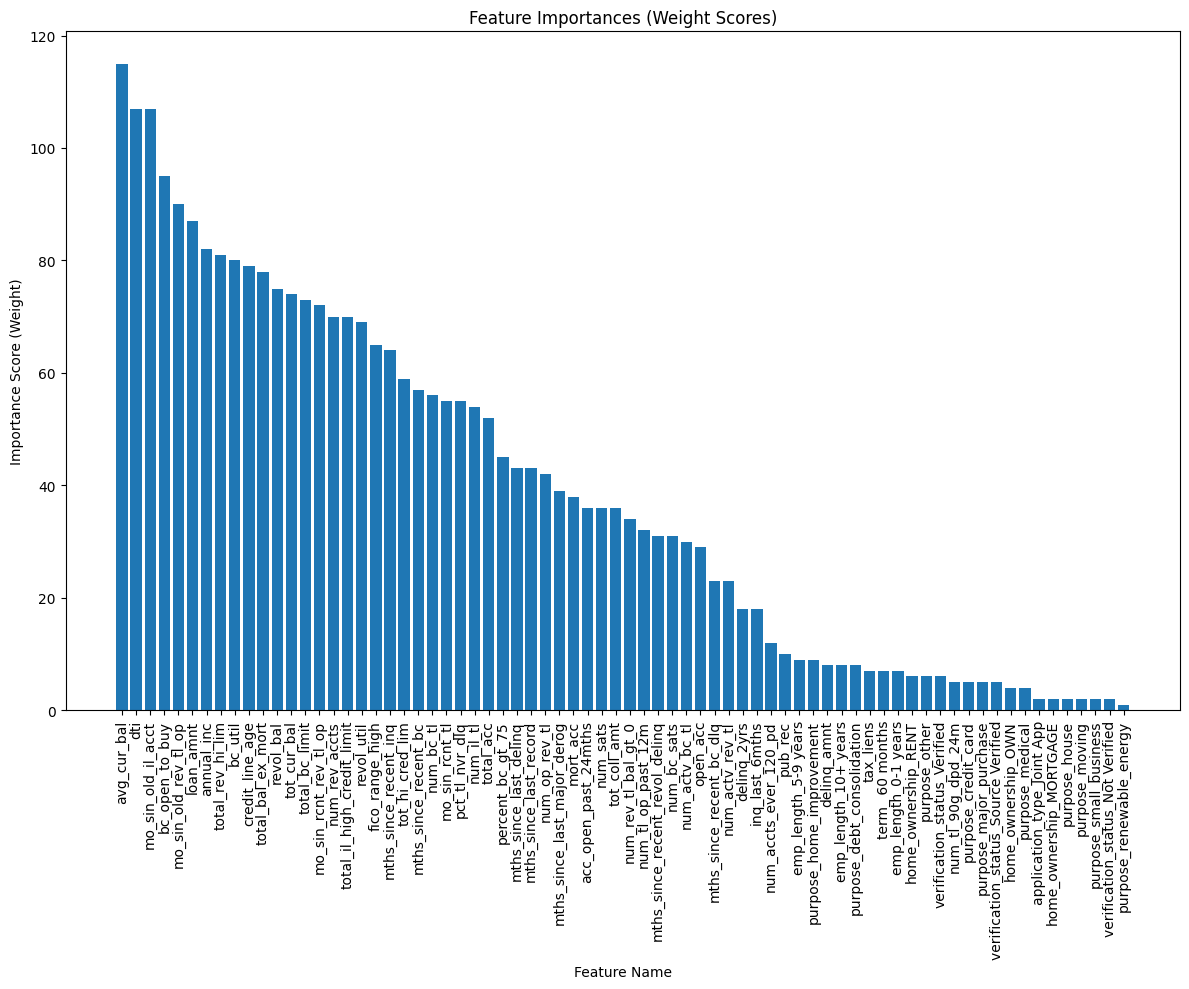

In [42]:
# Plot all Feature Importances (Weight Scores)
feature_importances = best_model.get_booster().get_score(importance_type='weight')
feature_importances = {selected_features[int(k[1:])]: v for k, v in feature_importances.items()}  # Match feature names
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(12, 10))
plt.bar(range(len(sorted_features)), [v for _, v in sorted_features], align='center')
plt.xticks(range(len(sorted_features)), [k for k, _ in sorted_features], rotation=90)
plt.xlabel('Feature Name')
plt.ylabel('Importance Score (Weight)')
plt.title('Feature Importances (Weight Scores)')
plt.tight_layout()
plt.show()

Skipping feature 'delinq_amnt' due to error: percentiles are too close to each other, unable to build the grid. Please choose percentiles that are further apart.


c:\Users\rbrul\Documents\GitHub\DSBA6010\.venv\Lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


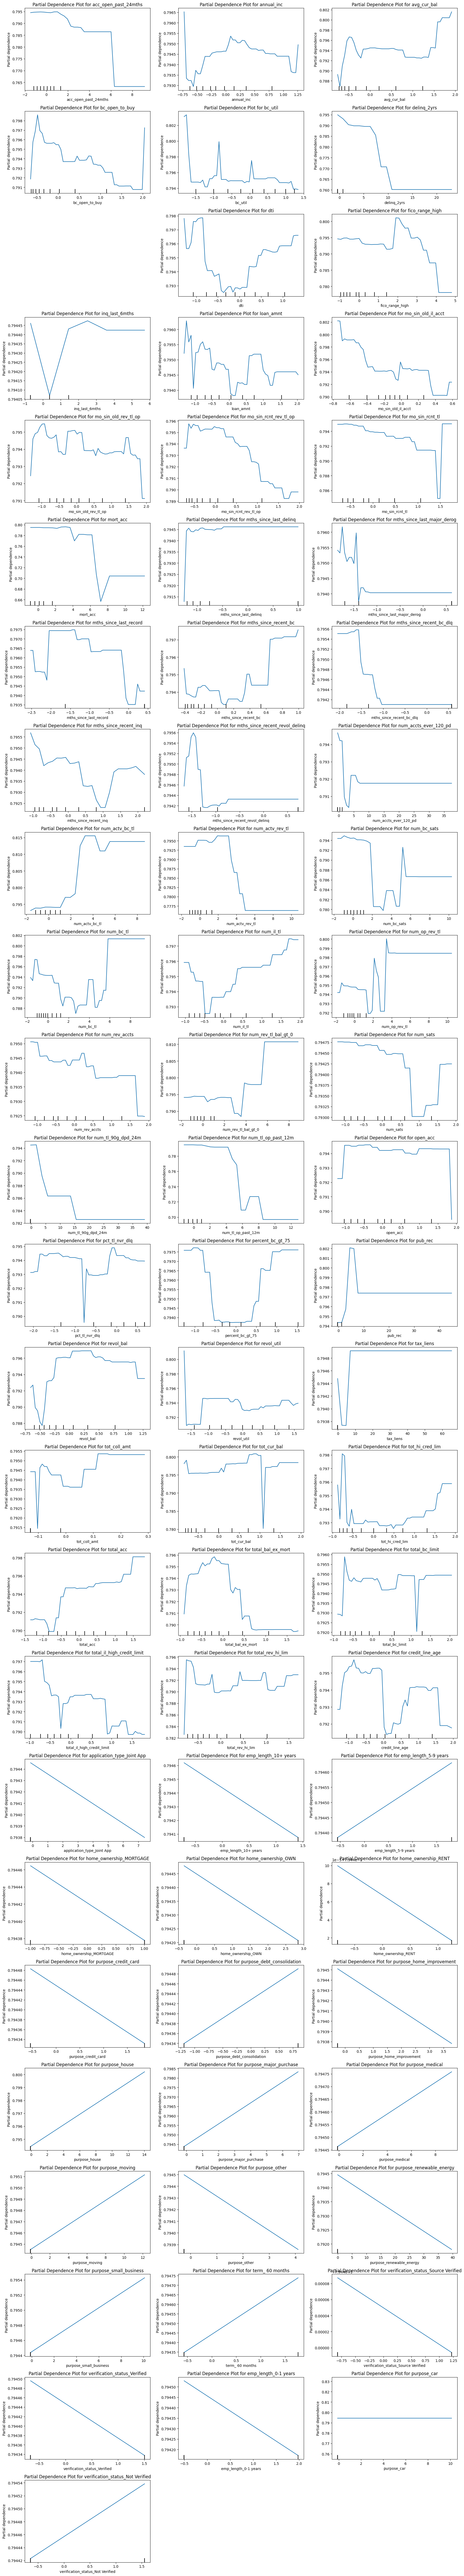

In [43]:
# Import necessary components again in case of lost context
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Create subplots for Partial Dependence Plots with a better fitting layout
n_features = len(selected_features)
n_rows = (n_features + 2) // 3
fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(18, 4 * n_rows))

# Flatten axes for easy iteration in case of multi-row layout
axes = axes.flatten()

# Iterate through selected features and plot Partial Dependence Plots
for i, feature in enumerate(selected_features):
    try:
        # Adjusted percentiles to avoid ValueError
        PartialDependenceDisplay.from_estimator(
            best_model,
            X_test_selected,
            features=[i],
            feature_names=selected_features,
            grid_resolution=50,
            percentiles=(0.05, 0.95),  # Adjusted percentiles to 5th and 95th
            ax=axes[i]
        )
        axes[i].set_title(f'Partial Dependence Plot for {feature}')
    except ValueError as e:
        # Handling the error gracefully by hiding the subplot and printing the issue
        axes[i].set_visible(False)
        print(f"Skipping feature '{feature}' due to error: {e}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


### Logistic Regression

In [44]:
# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],              # Adding 'l1' 'lbfgs'
    'C': [0.001, 0.01, 0.1, 1],            # Regularization strength
    'solver': ['liblinear', 'lbfgs'],      # 'lbfgs' 'liblinear' 
    'max_iter': [200, 500, 1000],          # Maximum number of iterations
}

# Initialize the logistic regression model
log_model = LogisticRegression()

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=log_model,
    param_grid=param_grid,
    scoring='accuracy',  # Use other metrics like 'f1' if appropriate
    cv=StratifiedKFold(n_splits=5),                # 3-fold cross-validation
    verbose=1,
    n_jobs=-1            # Use all processors
)

# Fit the model (assuming X_train and y_train are already prepared)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
best_log = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\rbrul\Documents\GitHub\DSBA6010\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rbrul\Documents\GitHub\DSBA6010\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rbrul\Documents\GitHub\DSBA6010\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rbrul\Documents\GitHub\DSBA6010\.ve

Best Parameters: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.7976687499999999


In [46]:
y_pred = best_log.predict(X_test_scaled)
y_pred_proba = best_log.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Create the dictionary
logistic_metrics = {
    "Accuracy": accuracy,
    "Precision (Class 1)": precision,
    "Recall (Class 1)": recall,
    "F1-Score (Class 1)": f1,
    "AUC (ROC)": roc_auc
}

print("\nLogistic Regression Metrics After Hyperparameter Tuning:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


Logistic Regression Metrics After Hyperparameter Tuning:
Accuracy: 0.6477
Precision: 0.8539
Recall: 0.6714
F1-Score: 0.7517
ROC AUC Score: 0.6574


c:\Users\rbrul\Documents\GitHub\DSBA6010\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\rbrul\Documents\GitHub\DSBA6010\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


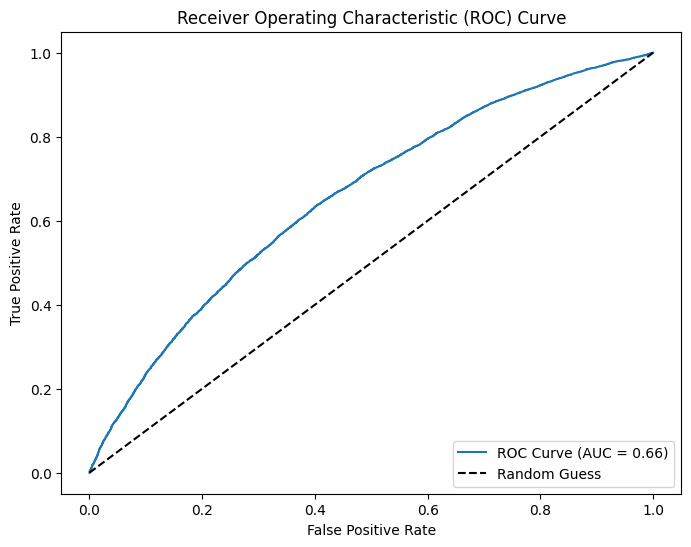

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()